In [1]:
import math
import numpy as np
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import random
import graphviz
from graphviz import Digraph
import sympy
from collections import defaultdict
import heapq
from os import walk
from datetime import datetime
import seaborn as sns

In [55]:
hosts = [3471260, 3471261, 3471262 ]
kytefiledata = pd.read_csv("../DeltaDataAlgo/datafiles/CumEg1.csv")
kytedata = kytefiledata[kytefiledata["host"].isin(hosts)]

radikas =  kytedata[kytedata["host"] == 3471260]
vent =  kytedata[kytedata["host"] == 3471261]
porand =  kytedata[kytedata["host"] == 3471262]

radikas["time"] = pd.to_datetime(radikas["time"])
vent["time"] = pd.to_datetime(vent["time"])
porand["time"] = pd.to_datetime(porand["time"])

radikas = radikas.drop_duplicates(subset=["value"])
vent = vent.drop_duplicates(subset=["value"])
porand = porand.drop_duplicates(subset=["value"])

radikas = radikas[radikas.time < "2020-11-21 07:00:00"]
vent = vent[vent.time < "2020-11-21 07:00:00"]
porand = porand[porand.time < "2020-11-21 07:00:00"]

radikas = radikas[radikas.time > "2020-09-24 07:00:00"]
vent = vent[vent.time > "2020-09-24 07:00:00"]
porand = porand[porand.time > "2020-09-24 07:00:00"]

<ipython-input-55-005b82158617>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radikas["time"] = pd.to_datetime(radikas["time"])
<ipython-input-55-005b82158617>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vent["time"] = pd.to_datetime(vent["time"])
<ipython-input-55-005b82158617>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [56]:
radikas = radikas.resample("12H", origin="2020-09-24 07:00:00.000", on="time").mean()
vent = vent.resample("12H", origin="2020-09-24 07:00:00.000", on="time").mean()
porand = porand.resample("12H", origin="2020-09-24 07:00:00.000", on="time").mean()

radikas = radikas.interpolate(method='time')
vent = vent.interpolate(method='time')
porand = porand.interpolate(method='time')

In [63]:
heatingdata = pd.DataFrame()
heatingdata = radikas["value"]

In [64]:
result1 = pd.concat([heatingdata, vent], axis=1)
result2 = result1.drop(['tags', 'host'], axis=1)
result3 = pd.concat([result2, porand], axis=1)
allheating = result3.drop(['tags', 'host'], axis=1)
allheating["sum"] = allheating.sum(axis=1)

<ipython-input-64-9a7869f25001>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allheating["sum"] = allheating.sum(axis=1)


In [65]:
allheating

value          value          value           sum
time                                                                          
2020-09-22 07:00:00  562216.000000  389530.000000  118055.000000  1.069801e+06
2020-09-22 19:00:00  562755.000000  389670.000000  118089.833333  1.070515e+06
2020-09-23 07:00:00  563216.666667  389795.000000  118155.500000  1.071167e+06
2020-09-23 19:00:00  563485.000000  389827.500000  118163.333333  1.071476e+06
2020-09-24 07:00:00  563740.000000  389865.000000  118170.000000  1.071775e+06
2020-09-24 19:00:00  563928.333333  389895.000000  118181.000000  1.072004e+06
2020-09-25 07:00:00  564217.500000  389925.000000  118206.500000  1.072349e+06
2020-09-25 19:00:00  564515.000000  389982.000000  118225.500000  1.072722e+06
2020-09-26 07:00:00  564855.000000  390055.000000  118282.500000  1.073192e+06
2020-09-26 19:00:00  565151.666667  390098.000000  118297.333333  1.073547e+06
2020-09-27 07:00:00  565524.000000  390145.000000  118340.000000  1.074009e+06
2020-09-27 19:00:00  565930.000000  390201.666667  118374.500000  1.074506e+06
2020-09-28 07:00:00  566400.000000  390280.000000  118478.600000  1.075159e+06
2020-09-28 19:00:00  566828.333333  390331.666667  118506.500000  1.075666e+06
2020-09-29 07:00:00  567192.000000  390375.000000  118539.400000  1.076106e+06
2020-09-29 19:00:00  567568.333333  390416.666667  118583.000000  1.076568e+06
2020-09-30 07:00:00  567946.666667  390470.000000  118650.666667  1.077067e+06
2020-09-30 19:00:00  568426.666667  390561.666667  118702.333333  1.077691e+06
2020-10-01 07:00:00  568973.333333  390690.000000  118776.400000  1.078440e+06
2020-10-01 19:00:00  569446.666667  390775.000000  118799.500000  1.079021e+06
2020-10-02 07:00:00  569965.000000  390885.000000  118849.400000  1.079699e+06
2020-10-02 19:00:00  570498.333333  390955.000000  118913.833333  1.080367e+06
2020-10-03 07:00:00  570955.000000  391020.000000  118954.600000  1.080930e+06
2020-10-03 19:00:00  571366.000000  391065.000000  118996.200000  1.081427e+06
2020-10-04 07:00:00  571876.666667  391116.000000  119036.500000  1.082029e+06
2020-10-04 19:00:00  572378.333333  391165.000000  119103.166667  1.082646e+06
2020-10-05 07:00:00  572708.000000  391195.000000  119156.000000  1.083059e+06
2020-10-05 19:00:00  572966.666667  391245.000000  119167.666667  1.083379e+06
2020-10-06 07:00:00  573277.500000  391315.000000  119198.500000  1.083791e+06
2020-10-06 19:00:00  573818.750000  391525.000000  119245.583333  1.084589e+06
2020-10-07 07:00:00  574360.000000  391735.000000  119292.666667  1.085388e+06
2020-10-07 19:00:00  574770.000000  391883.333333  119307.833333  1.085961e+06
2020-10-08 07:00:00  575106.000000  392000.000000  119339.750000  1.086446e+06
2020-10-08 19:00:00  575573.333333  392163.333333  119385.333333  1.087122e+06
2020-10-09 07:00:00  576141.666667  392388.000000  119543.833333  1.088074e+06
2020-10-09 19:00:00  576660.000000  392455.000000  119592.666667  1.088708e+06
2020-10-10 07:00:00  577361.666667  392485.000000  119653.500000  1.089500e+06
2020-10-10 19:00:00  578090.000000  392510.000000  119758.666667  1.090359e+06
2020-10-11 07:00:00  578730.000000  392540.000000  119954.833333  1.091225e+06
2020-10-11 19:00:00  579415.000000  392570.000000  120051.166667  1.092036e+06
2020-10-12 07:00:00  580056.666667  392595.000000  120236.500000  1.092888e+06
2020-10-12 19:00:00  580783.333333  392660.000000  120328.500000  1.093772e+06
2020-10-13 07:00:00  581440.000000  392980.000000  120563.400000  1.094983e+06
2020-10-13 19:00:00  582270.000000  393676.666667  120665.833333  1.096612e+06
2020-10-14 07:00:00  583181.666667  394421.666667  120765.333333  1.098369e+06
2020-10-14 19:00:00  583918.333333  394911.666667  120830.166667  1.099660e+06
2020-10-15 07:00:00  584733.333333  395501.666667  121009.500000  1.101244e+06
2020-10-15 19:00:00  585784.000000  396366.000000  121121.400000  1.103271e+06
2020-10-16 07:00:00  586633.333333  397098.333333  121273.333333  1.105005e+06


In [66]:
pd.set_option('display.max_rows', allheating.shape[0]+1)
print(allheating)

                             value          value          value           sum
time                                                                          
2020-09-22 07:00:00  562216.000000  389530.000000  118055.000000  1.069801e+06
2020-09-22 19:00:00  562755.000000  389670.000000  118089.833333  1.070515e+06
2020-09-23 07:00:00  563216.666667  389795.000000  118155.500000  1.071167e+06
2020-09-23 19:00:00  563485.000000  389827.500000  118163.333333  1.071476e+06
2020-09-24 07:00:00  563740.000000  389865.000000  118170.000000  1.071775e+06
2020-09-24 19:00:00  563928.333333  389895.000000  118181.000000  1.072004e+06
2020-09-25 07:00:00  564217.500000  389925.000000  118206.500000  1.072349e+06
2020-09-25 19:00:00  564515.000000  389982.000000  118225.500000  1.072722e+06
2020-09-26 07:00:00  564855.000000  390055.000000  118282.500000  1.073192e+06
2020-09-26 19:00:00  565151.666667  390098.000000  118297.333333  1.073547e+06
2020-09-27 07:00:00  565524.000000  390145.000000  1

In [67]:
totalheating = pd.DataFrame()
totalheating["value"] = allheating["sum"]

In [68]:
pd.set_option('display.max_rows', totalheating.shape[0]+1)
print(totalheating)

                            value
time                             
2020-09-22 07:00:00  1.069801e+06
2020-09-22 19:00:00  1.070515e+06
2020-09-23 07:00:00  1.071167e+06
2020-09-23 19:00:00  1.071476e+06
2020-09-24 07:00:00  1.071775e+06
2020-09-24 19:00:00  1.072004e+06
2020-09-25 07:00:00  1.072349e+06
2020-09-25 19:00:00  1.072722e+06
2020-09-26 07:00:00  1.073192e+06
2020-09-26 19:00:00  1.073547e+06
2020-09-27 07:00:00  1.074009e+06
2020-09-27 19:00:00  1.074506e+06
2020-09-28 07:00:00  1.075159e+06
2020-09-28 19:00:00  1.075666e+06
2020-09-29 07:00:00  1.076106e+06
2020-09-29 19:00:00  1.076568e+06
2020-09-30 07:00:00  1.077067e+06
2020-09-30 19:00:00  1.077691e+06
2020-10-01 07:00:00  1.078440e+06
2020-10-01 19:00:00  1.079021e+06
2020-10-02 07:00:00  1.079699e+06
2020-10-02 19:00:00  1.080367e+06
2020-10-03 07:00:00  1.080930e+06
2020-10-03 19:00:00  1.081427e+06
2020-10-04 07:00:00  1.082029e+06
2020-10-04 19:00:00  1.082646e+06
2020-10-05 07:00:00  1.083059e+06
2020-10-05 19:

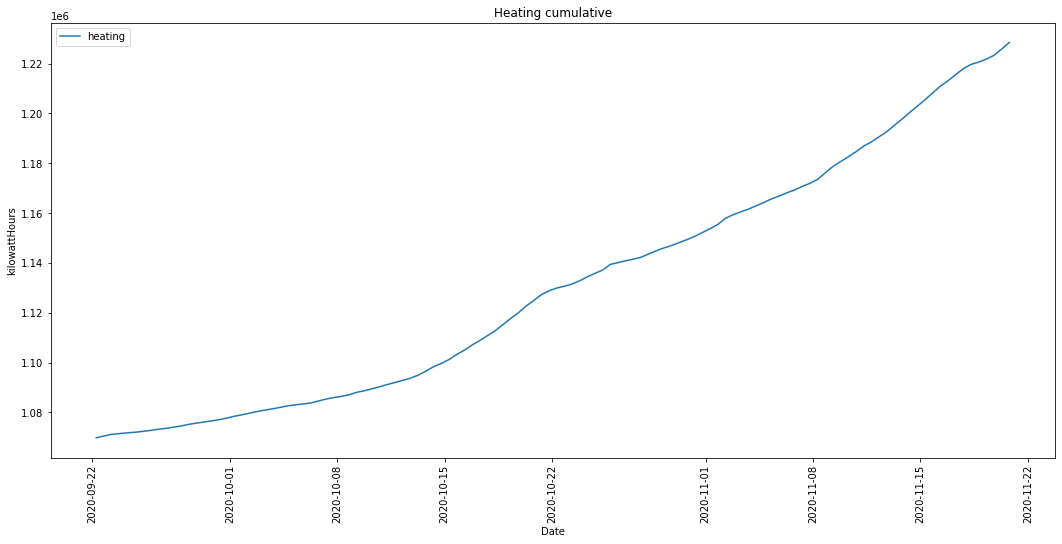

In [69]:
plt.figure(figsize=(18,8))
sns.lineplot(data=totalheating, x='time', y='value', label="heating")
plt.xticks(rotation=90)
plt.title("Heating cumulative")
plt.xlabel("Date")
plt.ylabel("kilowattHours")
plt.show()

In [70]:
addedHeating = pd.DataFrame()
addedHeating= totalheating

In [71]:
addedHeating = addedHeating.diff(periods=1, axis=0)

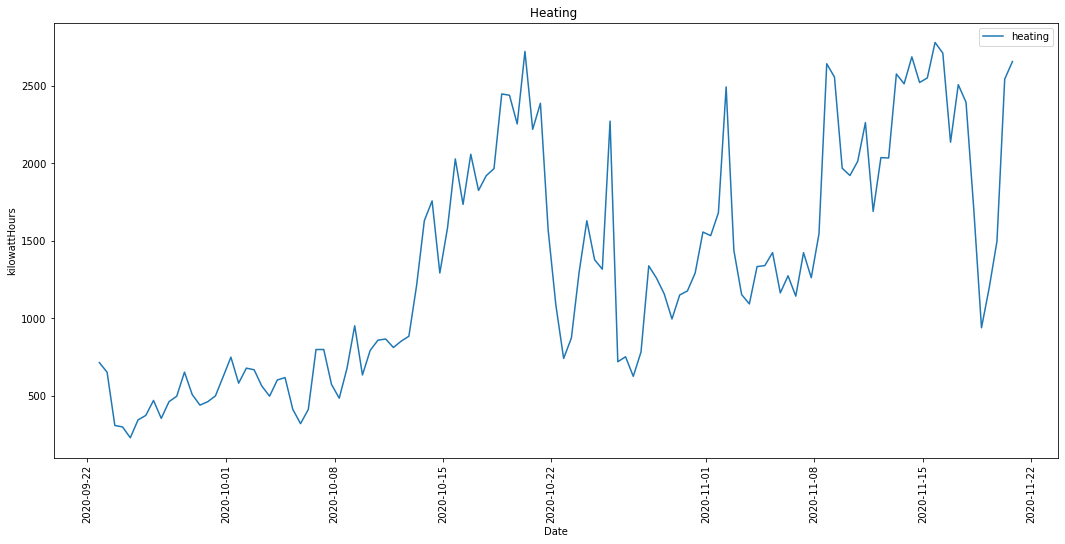

In [72]:
plt.figure(figsize=(18,8))
sns.lineplot(data=addedHeating, x='time', y='value', label="heating")
plt.xticks(rotation=90)
plt.title("Heating ")
plt.xlabel("Date")
plt.ylabel("kilowattHours")
plt.show()

In [73]:
addedHeating.value = (addedHeating.value-addedHeating.value.mean())/addedHeating.value.std()

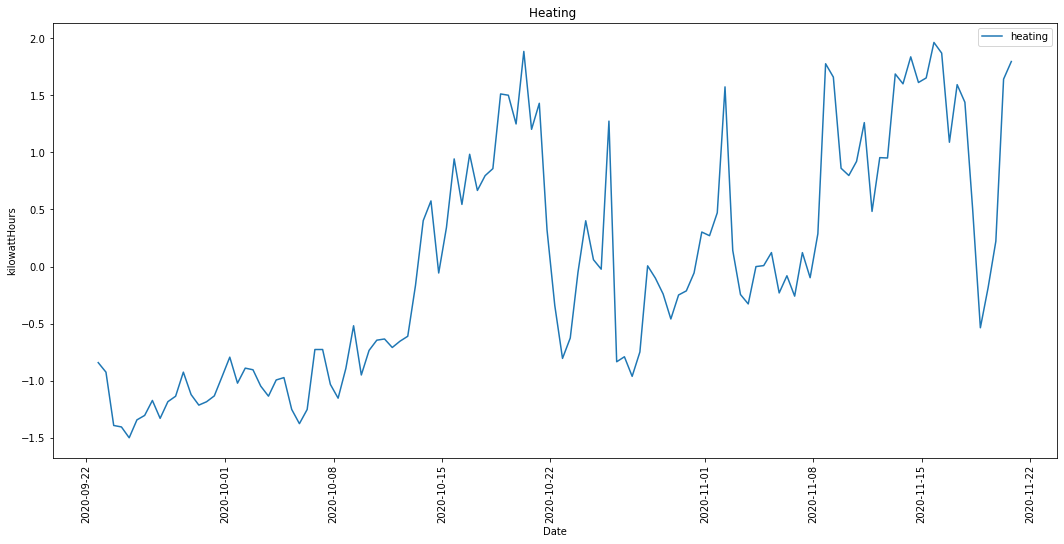

In [74]:
plt.figure(figsize=(18,8))
sns.lineplot(data=addedHeating, x='time', y='value', label="heating")
plt.xticks(rotation=90)
plt.title("Heating ")
plt.xlabel("Date")
plt.ylabel("kilowattHours")
plt.show()